<h1>Titanic: Machine Learning from Disaster</h1>
<h2>Investigando um conjunto de dados</h2>

<p>Para este projeto foi utilizado o arquivo que representa o conjunto de dados de treinamento</p>
<p>O conjunto de treinamento deve ser usado para construir seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como a “verdade fundamental”) para cada passageiro. Seu modelo será baseado em "recursos" como gênero e classe de passageiros.</p>
<p>Para navegar pelas diversas partes que compõe este projeto use os links a seguir</p>
<ol>
    <li><a href="#inicio">Iniciando o projeto</a></li>
    <li><a href="#segundo">Avaliando intituitivamente os dados</a></li>
    <li><a href="#terceiro">Limpando os dados</a></li>
    <li><a href="#quarto">Visualização dos dados</a></li>
    <li><a href="#quinto">Analisando dados</a></li>
    <li><a href="#sexto">Conclusão</a></li>
</ol>
<p>Perguntas feitas à análise</p>
<ul>
    <li>A idade do passageiro teve influência na sua taxa de sobrevivência?</li>
    <li>O gênero do passageiro teve influência na sua taxa de sobrevivência?</li>
    <li>A classe social do passageiro teve influência na sua taxa de sobrevivência?</li>
    <li>O porto de embarcação do passageiro teve influência na sua taxa de sobrevivência?</li>
</ul>

<h2><a name="inicio">1. Iniciando o projeto</a></h2>
<p>Na células a seguir são importadas as bibliotecas a serem utilizadas em seguida uma breve visualização destes dados é realizada</p>
<p>A visualização dos dados é tabular e limitada aos cinco primeiros registros, porém antes de o fazê-lo, é criado o Data Frame para os dados que serão analisados</p>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df_titanic = pd.read_csv('titanic-data-6.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p>Abaixo é construido uma visualização de quais as colunas que compõe o conjunto de dados</p>

In [7]:
for index, column in enumerate(df_titanic.columns):
    print(str(index) + ' - ' + str(column))

0 - PassengerId
1 - Survived
2 - Pclass
3 - Name
4 - Sex
5 - Age
6 - SibSp
7 - Parch
8 - Ticket
9 - Fare
10 - Cabin
11 - Embarked


<p>Extraindo do site <a href="https://www.kaggle.com/c/titanic/data" target="_blank">kaggle</a> os dados acima correspondem da seguinte forma</p>
<pre>
0 - PassengerId        = Id do Passageiro
1 - Survived           = Sobrevivência                                  (<i>0 = não, 1 = sim</i>)
2 - Pclass             = Classe de bilhetes                             (<i>1 = primeiro, 2 = segundo, 3 = terceiro</i>)
3 - Name               = Nome
4 - Sex                = Gênero
5 - Age                = Idade
6 - SibSp              = Número de irmãos / cônjuges a bordo do Titanic
7 - Parch              = Número de pais / filhos a bordo do Titanic
8 - Ticket             = Bilhete
9 - Fare               = Tarifa de passageiro
10 - Cabin             = Número da cabine
11 - Embarked          = Porto de embarcação                            (<i>C = Cherbourg, Q = Queenstown, S = Southampton</i>)
</pre>
<p>Outras informações complementares para o conjunto de dados</p>
<ul>
    <li><strong>Pclass:</strong> Uma proxy para status socioeconômico (SES) 
        <ul><li>1a = Alta</li>
            <li>2a = Média</li>
            <li>3a = Menor</li>
        </ul>
    </li>
    <li><strong>Age:</strong> A idade é fracionária se menor que 1. Se a idade é estimada, é na forma de xx.5</li>
    <li><strong>SibSp:</strong> O conjunto de dados define relações familiares desta forma ... 
        <ul><li>Irmão = irmã, irmão, meio-irmão, irmã adotiva</li> 
            <li>Esposa = marido, esposa (amantes e noivas foram ignorados)</li>
        </ul>
    </li>
    <li><strong>Parch:</strong> O conjunto de dados define as relações familiares desta forma... 
        <ul><li>Pai = mãe, pai</li>
            <li>Criança = filha, filho, enteada, enteado</li>
            <li>Algumas crianças viajavam apenas com uma babá, portanto parch = 0 para elas.</li>
        </ul>
    </li>
</ul>

<h2><a name="segundo">2. Avaliando intituitivamente os dados</a></h2>
<p>A partir deste ponto a biblioteca <a href="https://pandas.pydata.org/" target="_blank">Pandas</a> será utilizada para explorar os dados</p>

<p>Obtém uma tupla com as dimensões do <i>Data Frame</i> explorado no formato (número de linhas, número de colunas)</p>

In [8]:
df_titanic.shape

(891, 12)

<p>Obtém o tipo de dados de cada coluna do <i>Data Frame</i></p>
<p>A principio os tipos de dados e a amostra observada acima demonstra que não há uma necessidade de converção entre tipos de dados</p>

In [9]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<p>Obtém um resumo do <i>Data Frame</i>, sendo possível observar a distriuição de registros nulos e não-nulos</p>
<p>A ausência de registros para as colunas <strong>Age</strong>, <strong>Cabin</strong> e <strong>Embarked</strong> podem vir a atrapalhar a analise do dados e posteriormente devem ser trabalhados adequadamente</p>

In [10]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<p>Obtém o número de valores unicos por coluna no <i>Data Frame</i></p>

In [11]:
df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<p>Abaixo faremos verificações para saber se os dados unicos de determinadas colunas correspondem ao que foi informado no dicionário de dados que foi apresentado anteriormente</p>

In [12]:
set(df_titanic['Survived'])

{0, 1}

In [13]:
set(df_titanic['Pclass'])

{1, 2, 3}

In [14]:
set(df_titanic['Embarked'])

{'C', 'Q', 'S', nan}

<p>Podemos observar que os valores correspondem ao do dicionário, porém a última célula revela que temos a presença de um valor nulo, este caso será tratado posteriormente</p>
<p>Seguindo o entendimento acima, iremos repetir o código para outras colunas para investigar melhor a composição das instâncias do <i>Data Frame</i></p>

In [15]:
set(df_titanic['Sex'])

{'female', 'male'}

In [16]:
set(df_titanic['SibSp'])

{0, 1, 2, 3, 4, 5, 8}

In [17]:
set(df_titanic['Parch'])

{0, 1, 2, 3, 4, 5, 6}

<p>Obtém estatísticas descritivas do conjunto de dados</p>
<p>Observe que até aqui está notório que o <i>Data Frame</i> tem sua composuição disforme, isto será tratado adequadamente posteriormente, no entanto, a execução deste ponto foi para fazer comparativo após o tratamento dos dados</p>

In [18]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2><a name="terceiro">3. Limpando os dados</a></h2>
<p>A partir deste ponto os dados serão tratados para remover as inconsistências</p>

<p>O código abaixo calcula a idade média da coluna idade e atribui esta média para as colunas que estão com este dado faltante</p>
<p>É possível observar que a média não mudou com este procedimento, porém agora a coluna <strong>Age</strong> passa a ter o mesmo número de registros que as outras colunas acima</p>

In [19]:
mean_age = df_titanic['Age'].mean()
print(str(mean_age))

29.69911764705882


In [20]:
df_titanic['Age'].fillna(mean_age, inplace=True)

In [21]:
print(str(df_titanic['Age'].mean()))

29.69911764705882


In [22]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<p>O codigo abaixo lida com a falta de registro para a Coluna Cabin</p>
<p>Uma possível estratégia poderia ser a exclusão das linhas em que o atributo não está presente, porém, com o código abaixo podemos perceber que pouco mais de 82% dos registros não possuem este atributo. Assim descartar os dados neste caso pode não ser interessante</p>
<p>A coluna 'cabin' identifica em qual cabine o bilhete estava associado.</p>
<p>Observando alguns registros os dados da coluna é composto por uma letra concatenada com uma sequência de números</p>
<p>Poderiamos então atribuir a cabine com maior frequencia nos registros vazios, porém esta estratégia se mostra sem muito sentido lógico, já que ocasinaoria um entedimento de superlotação em uma única cabine</p>
<p>Observando um pouco mais as cabines com maior lotação possuem 4 ocorrências, reforçando a ideia acima</p>
<p>Por fim, para que os dados não viessem a ser desconsiderados a estratégia foi atribuir uma classe denominada <strong>T0</strong>, assim assumimos que os tickets foram vendidos, mas há ausência da informação da lotação dos mesmos, cuja resposta não pode ser determinada neste conjunto de dados</p>

In [23]:
df_total_lines = df_titanic.shape[0]
cabin_total = df_titanic['Cabin'].count()
cabin_percent = (cabin_total / df_total_lines) * 100

msg = "Total lines for Data Frame = {}\nTotal lines for column Cabin = {}\nPercent = {}"
print(msg.format(str(df_total_lines), str(cabin_total), str(cabin_percent)))

Total lines for Data Frame = 891
Total lines for column Cabin = 204
Percent = 22.895622895622896


In [24]:
print(set(df_titanic['Cabin']))

{nan, 'B71', 'D36', 'A32', 'B38', 'C50', 'C124', 'D28', 'D17', 'D9', 'E36', 'D37', 'E58', 'B69', 'F38', 'A36', 'C7', 'D46', 'C70', 'F33', 'C49', 'D11', 'F4', 'D20', 'A24', 'B28', 'B102', 'B30', 'C65', 'E17', 'A7', 'F E69', 'C111', 'B79', 'B86', 'D48', 'T', 'E63', 'B77', 'B94', 'D7', 'C104', 'B58 B60', 'D21', 'E25', 'D50', 'C91', 'D6', 'B18', 'D10 D12', 'E50', 'D45', 'C54', 'C99', 'B50', 'C126', 'C93', 'A26', 'A5', 'C148', 'B73', 'B20', 'F G63', 'A34', 'C103', 'E31', 'B5', 'B35', 'E34', 'B51 B53 B55', 'C85', 'A19', 'B37', 'B101', 'B4', 'C86', 'D33', 'C123', 'C83', 'D', 'C95', 'C78', 'C62 C64', 'D30', 'E40', 'E33', 'C52', 'C30', 'C110', 'E67', 'A31', 'E77', 'C47', 'B41', 'E8', 'A20', 'F G73', 'C45', 'C125', 'E38', 'B57 B59 B63 B66', 'F2', 'C82', 'B39', 'D15', 'C32', 'B96 B98', 'D47', 'C2', 'B22', 'B19', 'C23 C25 C27', 'C106', 'D35', 'E44', 'B49', 'C46', 'C128', 'A10', 'A23', 'E101', 'C92', 'D19', 'E24', 'B78', 'B3', 'B42', 'B82 B84', 'E49', 'C22 C26', 'C87', 'G6', 'B80', 'E10', 'E12', 'A

In [25]:
df_titanic['Cabin'].value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
C22 C26            3
F33                3
E101               3
F2                 3
D                  3
B51 B53 B55        2
C78                2
B57 B59 B63 B66    2
B49                2
E67                2
C92                2
B58 B60            2
E25                2
B77                2
B22                2
B5                 2
E33                2
E44                2
E8                 2
D35                2
F G73              2
B35                2
C2                 2
C125               2
D17                2
B28                2
D20                2
                  ..
E50                1
A23                1
C90                1
D10 D12            1
C82                1
B39                1
D49                1
D15                1
C32                1
D47                1
B19                1
A7                 1
E10                1
F E69              1
E58                1
B86                1
D48          

In [26]:
df_titanic['Cabin'].fillna('T0', inplace=True)

In [27]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<p>Analisaremos a coluna <strong>Embarked</strong>.</p>
<p>Seguindo o mesmo princípio do passo anterior tentamos visualizar em números a falta de dados. Porém, aqui a quantidade chega a ser insignificante. Portanto, a estratégia é eliminar as linhas cujos os dados da coluna <strong>Embarked</strong> não estejam presente</p>
<p>Cabe pbservar que atribuir um valor aqui pode não ser uma boa estratégia, pois além do baixo número de registros, o significado da coluna, que informa em qual porto a pessoa embarcou. Inserir um valor aleatório pode gerar uma interpretação confuda, e manter a persistência destes dados com poucos registros, em análise numérica/tabular ou gráfica, geraram resultados irrisórios</p>

In [28]:
embarked_total = df_titanic['Embarked'].count()
embarked_percent = (embarked_total / df_total_lines) * 100

msg = "Total lines for Data Frame = {}\nTotal lines for column Cabin = {}\nPercent = {}"
print(msg.format(str(df_total_lines), str(embarked_total), str(embarked_percent)))

Total lines for Data Frame = 891
Total lines for column Cabin = 889
Percent = 99.77553310886644


In [29]:
df_titanic.dropna(inplace=True)

In [30]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          889 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


<p>Neste ponto os dados são observados para verificar se existem ocorrências duplicadas</p>
<p>Observando então que não há ocorrências duplicadas então não há necessidade de executar qualquer procedimento</p>

In [31]:
sum(df_titanic.duplicated())

0

<p>Neste ponto iremos renomear as colunas para que estas se adequem ao padrão da comunidade de análise de dados</p>
<p>Este padrão indica que o nome das colunas devem ser compostos por letras minúsculas</p>

In [32]:
new_labels = []
for col in df_titanic.columns:
    new_labels.append(col.lower())

print(new_labels)

['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


In [33]:
df_titanic.columns = new_labels
df_titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,T0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,T0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,T0,S


<p>Após a limpeza salvamos o <i>Data Frame</i> trabalhado em um novo arquivo</p>

In [34]:
df_titanic.to_csv('titanic-data-6-edited.csv', index=False)

<h2><a name="quarto">4. Visualização dos dados</a></h2>
<p>A patir deste ponto usaremos o <a href="https://matplotlib.org/" target="_blank">MatplotLib</a> para visualizar graficamente o que os dados podem nos dizer</p>

In [35]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
passengerid    889 non-null int64
survived       889 non-null int64
pclass         889 non-null int64
name           889 non-null object
sex            889 non-null object
age            889 non-null float64
sibsp          889 non-null int64
parch          889 non-null int64
ticket         889 non-null object
fare           889 non-null float64
cabin          889 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


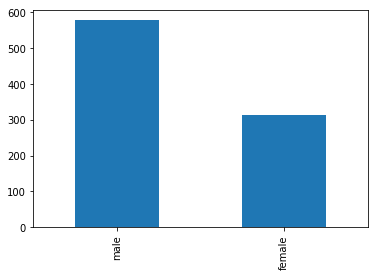

In [36]:
df_titanic['sex'].value_counts().plot(kind='bar');

<p>Com o gráfico abaixo percebe-se a distribuição de passageiros por porto de embarcação sendo a maior frequência <i>Southampton</i></p>

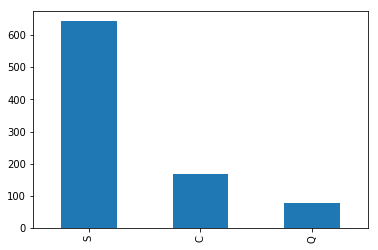

In [37]:
df_titanic['embarked'].value_counts().plot(kind='bar');

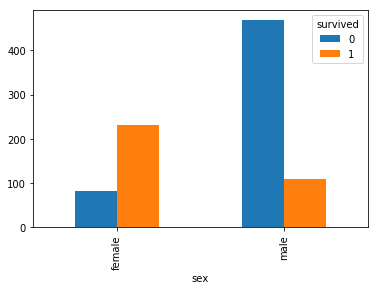

In [38]:
df_titanic.groupby(['sex', 'survived']).size().unstack().plot.bar()

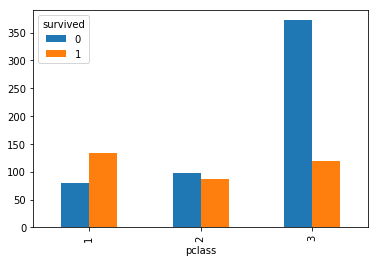

In [39]:
df_titanic.groupby(['pclass', 'survived']).size().unstack().plot.bar()

<h2><a name="quinto">5. Analisando dados</a></h2>
<p>Neste ponto perguntas são elaboradas com base no tratamento dos dados e nas visualizações construídas. Assim procurando entender alguns possiveis fatores determinantes para a sobrevivência</p>

A idade do passageiro teve influência na sua taxa de sobrevivência?
<p>A demonstração abaixo analise a idade como impactante para a sobrevivência</p>
<p>O que se entende que a idade inferior a 20 e superior a 30~35 anos determina a sobrevivência do individuo, ou seja, <strong>crianças e idosos primeiro!</strong></p>

In [40]:
df_titanic_survived = df_titanic.query('survived == 1').iloc[:,:]
df_titanic_survived.shape

(340, 12)

In [41]:
df_titanic_not_survived = df_titanic.query('survived == 0').iloc[:,:]
df_titanic_not_survived.shape

(549, 12)

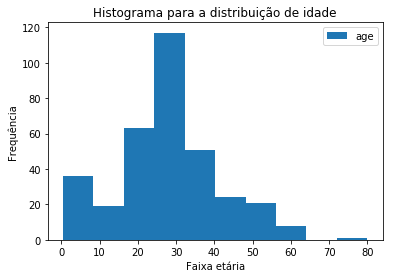

In [58]:
ax = df_titanic_survived['age'].plot(kind='hist', title='Histograma para a distribuição de idade', legend=True);
ax.set_xlabel("Faixa etária");
ax.set_ylabel("Frequência");

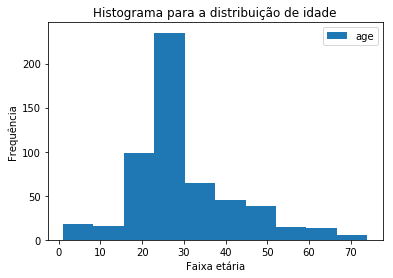

In [59]:
ax = df_titanic_not_survived['age'].plot(kind='hist', title='Histograma para a distribuição de idade', legend=True);
ax.set_xlabel("Faixa etária");
ax.set_ylabel("Frequência");

In [44]:
df_titanic_survived.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,340.000000,340.0,340.000000,340.000000,340.000000,340.000000,340.000000
mean,444.358824,1.0,1.955882,28.423600,0.476471,0.467647,48.209498
std,251.377692,0.0,0.862763,13.682862,0.709838,0.773156,66.748773
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,254.250000,1.0,1.000000,21.000000,0.000000,0.000000,12.443750
50%,439.500000,1.0,2.000000,29.699118,0.000000,0.000000,26.000000
75%,650.500000,1.0,3.000000,35.000000,1.000000,1.000000,56.946900
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [45]:
df_titanic_not_survived.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.415100,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,12.457370,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,23.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,29.699118,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,35.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [46]:
# cria a coluna com a faixa etaria
df_titanic["faixa_etaria"] = pd.cut(df_titanic.age, range(0,100,10))
# calcula o percentual de sobrevivencia por faixa etaria
df_titanic.groupby(["faixa_etaria", "survived"]).size() * 100/df_titanic.groupby("survived").size()

faixa_etaria  survived
(0, 10]       0            4.735883
              1           11.176471
(10, 20]      0           12.932605
              1           12.941176
(20, 30]      0           49.362477
              1           40.000000
(30, 40]      0           15.664845
              1           20.000000
(40, 50]      0            9.653916
              1            9.705882
(50, 60]      0            4.553734
              1            5.000000
(60, 70]      0            2.367942
              1            0.882353
(70, 80]      0            0.728597
              1            0.294118
dtype: float64

<p>O gênero do passageiro teve influência na sua taxa de sobrevivência?</p>

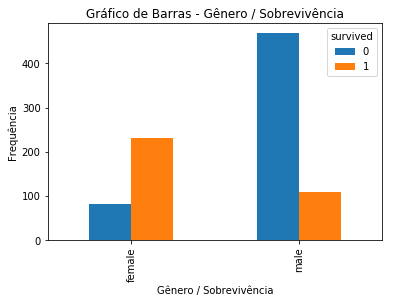

In [62]:
ax = df_titanic.groupby(['sex', 'survived']).size().unstack().plot.bar(title='Gráfico de Barras - Gênero / Sobrevivência', 
                                                                       legend=True);
ax.set_xlabel("Gênero / Sobrevivência");
ax.set_ylabel("Frequência");

<p>A classe social do passageiro teve influência na sua taxa de sobrevivência?</p>

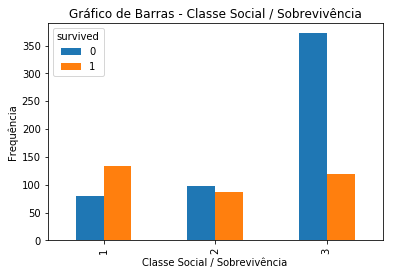

In [65]:
ax = df_titanic.groupby(['pclass', 'survived']).size().unstack().plot.bar(title='Gráfico de Barras - Classe Social / Sobrevivência', 
                                                                       legend=True);

ax.set_xlabel("Classe Social / Sobrevivência");
ax.set_ylabel("Frequência");

<p>O porto de embarcação do passageiro teve influência na sua taxa de sobrevivência?</p>

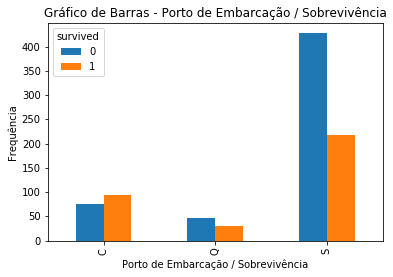

In [66]:
ax = df_titanic.groupby(['embarked', 'survived']).size().unstack().plot.bar(title='Gráfico de Barras - Porto de Embarcação / Sobrevivência', 
                                                                       legend=True);
ax.set_xlabel("Porto de Embarcação / Sobrevivência");
ax.set_ylabel("Frequência");

<h2><a name="sexto">4. Conclusão</a></h2>
<p>As variváveis <strong>idade</strong>, <strong>gênero</strong>, <strong>classe social</strong> e <strong>porto de embarque</strong> foram analisadas, observa-se então que</p>
<ul>
    <li>A idade inferior a 20 e superior a 30~35 anos determina a sobrevivência do individuo</li>
    <li>Houve maior sobreviventes do genero masculino</li>
    <li>A sobrevivência entre o gênero masculino se deu pelo maior número de homens contabilizando crianças e idosos</li>
    <li>Houve maior sobreviventes da classe social média e baixa</li>
    <li>Houve maior sobreviventes que embarcaram em <i>Queenstown</i> e <i>Southampton</i></li>
    <li>Houve maior sobreviventes que embarcaram <i>Southampton</i> se comparados aos outros locais de embarcação</li>
    </ul>
<p>A partir dos apontamentos acima os seguintes vieses foram analisados</p>
<ul>
    <li>Quais são as consequências de ter valores ausentes? <br/> Depende do tratamento que será dado para estes valores, em alguns casos a ausência pode ser contornado com a substituição estatisca do valor em outros casos somente um "recorte" dos dados pode ser utilziado, no entanto, independente da técnica utilizada os resultados podem ser um pouco distantes do real</li>
    <li>Quanto você confia nos resultados sem utilizar testes estatísticos?<br/> Nem um pouco, a intenção de usar métodos estatísticos é conseguir fazer uma análise mais aproximada do real e menos intuitiva</li>
<li>O barco tinha uns 1300 passageiros mais a tripulação. Mais este arquivo csv só tem 891 passageiros? Como isso pode afetar a análise?<br/> Pode trazer variação nos dados, principalmente porque os demais registros podem ter informações que se analisadas da mesma maneira que feito até aqui resultariam em informações completamente diferente</li>
    </ul>